# Decision Trees



In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score


## Titanic Passengers Dataset

In [5]:
train = pd.read_csv('ed-titanic-training.csv')
test = pd.read_csv('ed-titanic-test.csv')
train = train.drop("Unnamed: 0", axis = 1)
test = test.drop("Unnamed: 0", axis = 1)
train['Age'][train['Age'] > 3] = 4
test['Age'][test['Age'] > 3] = 4 
train.head(3)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,0,2,0,3,1,1,2,0,3
2,1,3,0,1,0,1,0,0,1,1,4


In [6]:
titles = {1: 'Mr' , 
          2: 'Master',
          3: 'Mrs',
          4: 'Miss',
          5:  'Rare'}
age_groups = {
          0: '0-20' , 
          1: '20-30',
          2: '30-40',
          3: '40-60',
          4:  '60+'}

## Pearson Correlation Between Fetures of the Training Dataset

<Axes: title={'center': 'Pearson Correlation of Features'}>

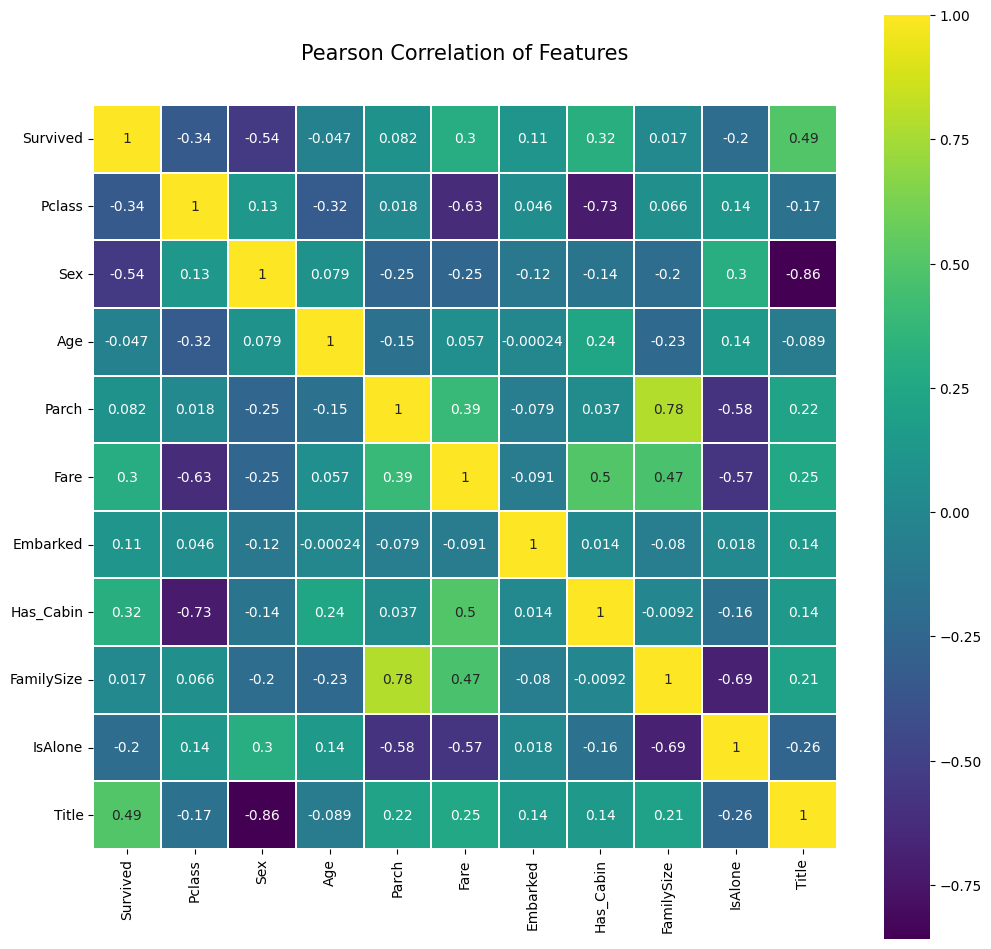

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0,
square=True, cmap=colormap, linecolor='white', annot=True)

**Features that are the most correlated with the survival label**

Having family on board is most positively correlated with surviving a disaster (column `Parch`). This would potentially indicate a greater chance of survival, due to the help of family members on board. The second most positively correlated characteristic is title. Individuals with the title `Rare` were therefore more likely to survive which is consistent with intuition. In contrast, gender is most negatively correlated with surviving a disaster. Gender repre-sented by a value of 1 (women) was therefore less likely to survive. 

**Features that are the most correlated with each other?**

Naturally, `Parch` correlates strongly with `Family Size`. One can guess that for a trip as prestigious and long as the Titanic voyage, families tended to go together. The strongest negative correlations are gender and title. Women at the time of the Titanic did not have access to titles like `Bishop`, `Captain`, etc. 

## Survival Rate For Titles

In [8]:
train.groupby('Title')['Survived'].mean()

Title
1    0.156673
2    0.575000
3    0.793651
4    0.702703
5    0.347826
Name: Survived, dtype: float64

Highest survival rate for `Mrs` & `Miss`.

## Decision Tree Classifier

In [9]:
X_train = train.drop('Survived', axis =1 )
y_train = train['Survived']
X_test = test

### Calculating Optimal Tree Depth

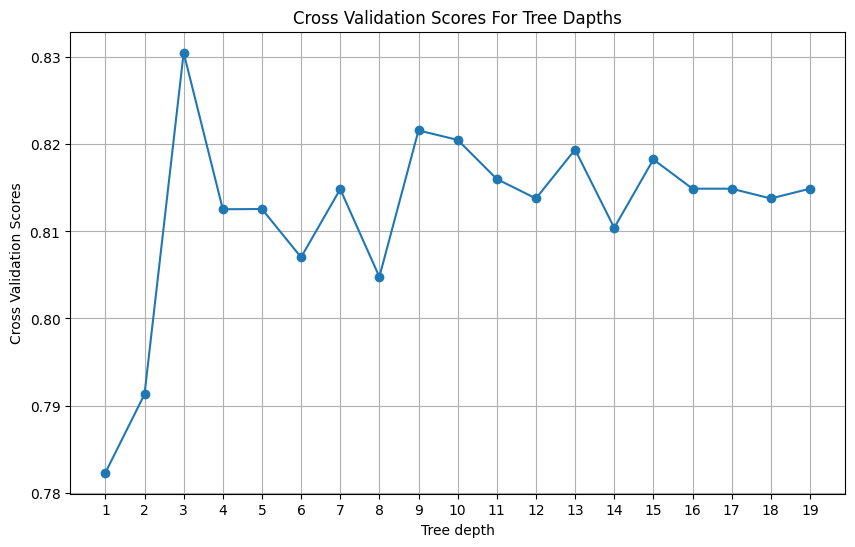

Optimal tree depth: 3


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# possible depths 
depths = range(1, 20)

#cross validation scores
mean_scores = []


# Perform cross-validation for different tree depths
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, criterion='gini') 
    scores = cross_val_score(clf, X_train, y_train, cv=10) # 10-fold cross-validation
    mean_scores.append(np.mean(scores))

plt.figure(figsize=(10, 6))
plt.plot(depths, mean_scores, marker='o', linestyle='-')
plt.title('Cross Validation Scores For Tree Dapths')
plt.xlabel('Tree depth')
plt.ylabel('Cross Validation Scores')
plt.xticks(depths)
plt.grid(True)
plt.show()


#calculating optimal dree depth
best_depth = depths[np.argmax(mean_scores)]
print("Optimal tree depth:", best_depth)
     

### Model Fitting and Predictions

In [11]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth = 3,
criterion='gini')
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [12]:
predictions = decision_tree.predict(X_test)
pred_df = pd.DataFrame(predictions)
pred_df.to_csv("titanic_predictions.csv", header = ["Survived"])

### Tree Visualization

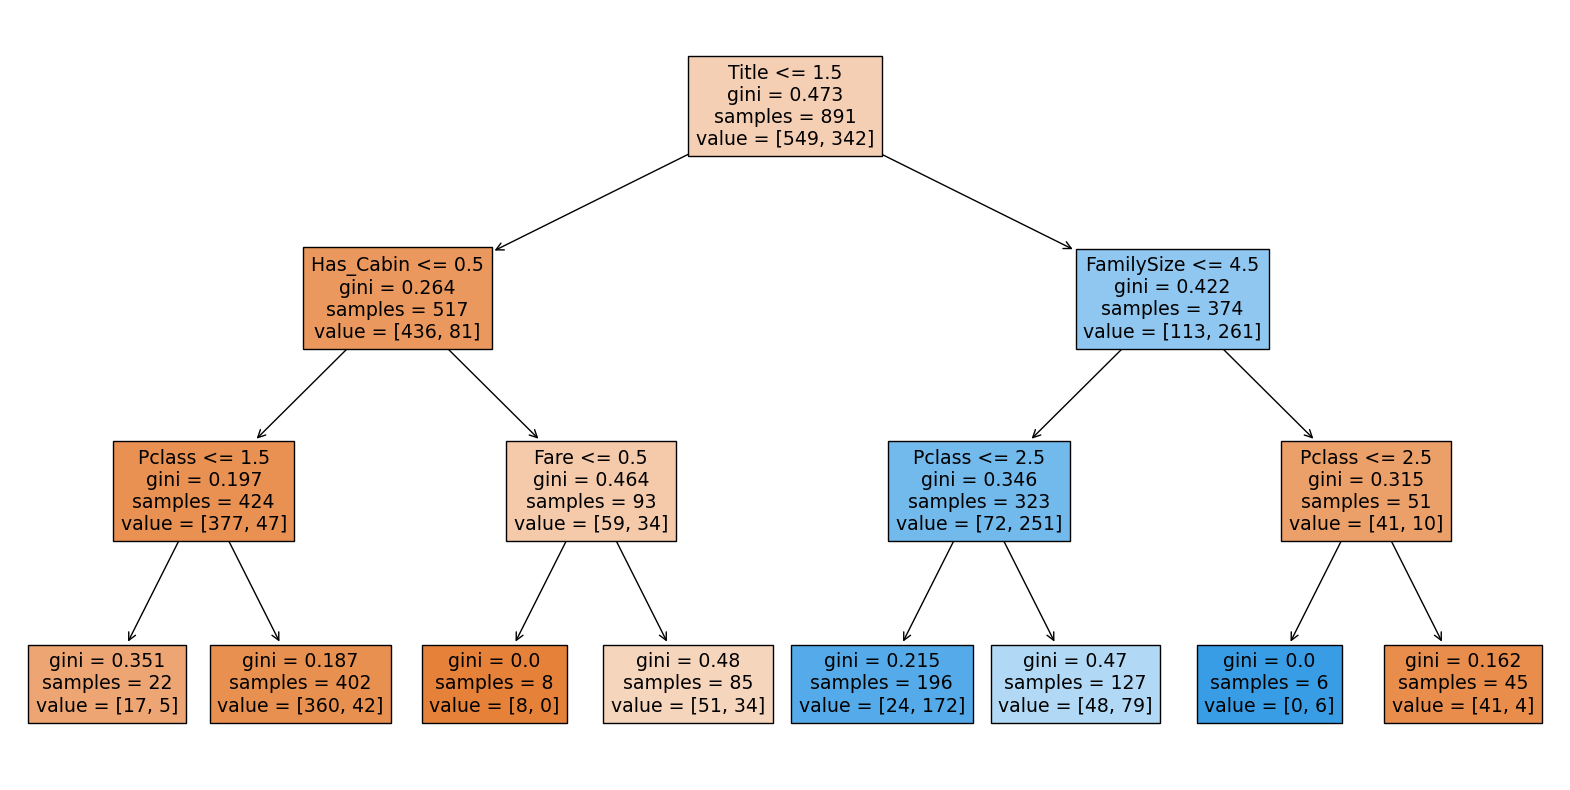

In [13]:
plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree, filled=True, feature_names=test.columns)
plt.show()

### Influence on cross-validation score: gini vs. entropy, min samples leaf, maximum tree depth
Summary of three model parameters for different sample configurations and analysis of their impact on the result of pairwise crossover. 

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

# Defining parameters
criterions = ['gini', 'entropy']
min_samples_leaf_values = [1, 5, 10]
max_depths = [3, 5, 10]

# Cross-validation scores
results = []

#  Perform cross-validation for each combination of parameters
for criterion in criterions:
    for min_samples_leaf in min_samples_leaf_values:
        for max_depth in max_depths:
            clf = DecisionTreeClassifier(criterion=criterion, min_samples_leaf=min_samples_leaf, max_depth=max_depth)
            scores = cross_val_score(clf, X_train, y_train, cv=10) # 10-fold cross-validation
            mean_score = np.mean(scores)
            results.append((criterion, min_samples_leaf, max_depth, mean_score))

# Creating a DataFrame with the results
df = pd.DataFrame(results, columns=['Criterion', 'Min Samples Leaf', 'Max Depth', 'Mean Cross-Validation Score'])
print("\nSelection of parameters for which the crossover result is best:")
df.sort_values('Mean Cross-Validation Score', ascending=False).head(1)


Dobór parametrów dla których wynik kroswalizacji jest najlepszy:


,Criterion,Min Samples Leaf,Max Depth,Mean Cross-Validation Score
3,gini,5,3,0.931987


####   Gini vs. entropy and max tree depth

The best result is achieved for the gini criterion and macximal depth of 3, which, as shown earlier, was optimal for this criterion. 

/var/folders/8v/tm7yft957w550wkmct80twp00000gn/T/ipykernel_44485/3044974716.py:2: FutureWarning: The provided callable <function mean at 0x10567b2e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_scores = df.pivot_table(index='Criterion', columns='Max Depth',


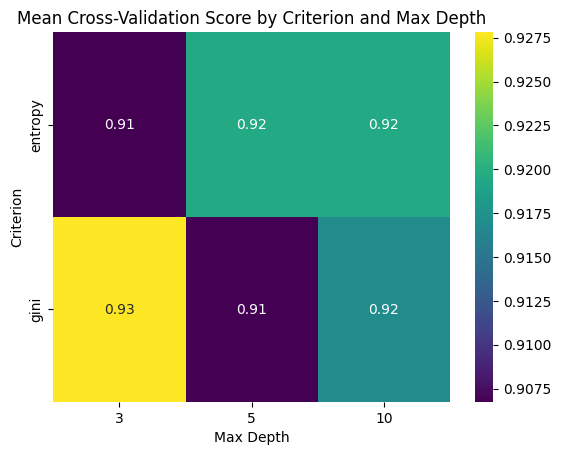

In [70]:
# Calculate mean cross-validation score for each parameter combination
mean_scores = df.pivot_table(index='Criterion', columns='Max Depth',
                              values='Mean Cross-Validation Score', aggfunc=np.mean)

# Create the heatmap
sns.heatmap(mean_scores, cmap='viridis', annot=True, fmt='.2f')
plt.title('Mean Cross-Validation Score by Criterion and Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Criterion')
plt.show()

####  Gini vs. entropy and mean leaf samples

Here the best result is also achieved for the gini criterion, for a minimum number of records in the leaf equal to 5, but for 10 the result was slightly worse. 

/var/folders/8v/tm7yft957w550wkmct80twp00000gn/T/ipykernel_44485/2281513596.py:2: FutureWarning: The provided callable <function mean at 0x10567b2e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_scores = df.pivot_table(index='Criterion', columns='Min Samples Leaf',


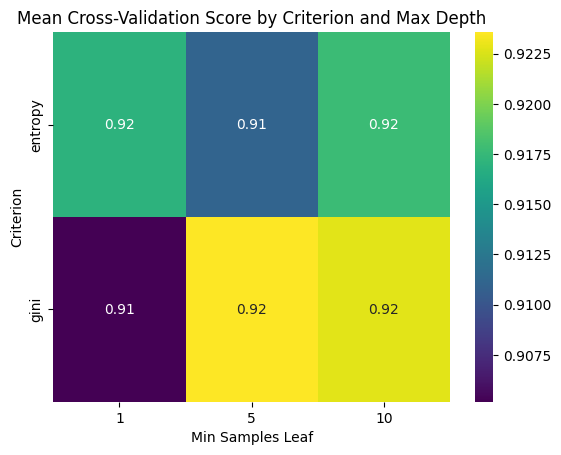

In [71]:
# Calculate mean cross-validation score for each parameter combination
mean_scores = df.pivot_table(index='Criterion', columns='Min Samples Leaf',
                              values='Mean Cross-Validation Score', aggfunc=np.mean)

# Create the heatmap
sns.heatmap(mean_scores, cmap='viridis', annot=True, fmt='.2f')
plt.title('Mean Cross-Validation Score by Criterion and Max Depth')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Criterion')
plt.show()

####  Min Samples Leaf and Max Tree Depth

Considering only these two parameters, the best cross-validation result is obtained for the maximum parameters in this 10 x 10 sample. However, it is only slightly better than other combinations (3x1, 3x5 and others).

/var/folders/8v/tm7yft957w550wkmct80twp00000gn/T/ipykernel_44485/1550188225.py:2: FutureWarning: The provided callable <function mean at 0x10567b2e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_scores = df.pivot_table(index='Max Depth', columns='Min Samples Leaf',


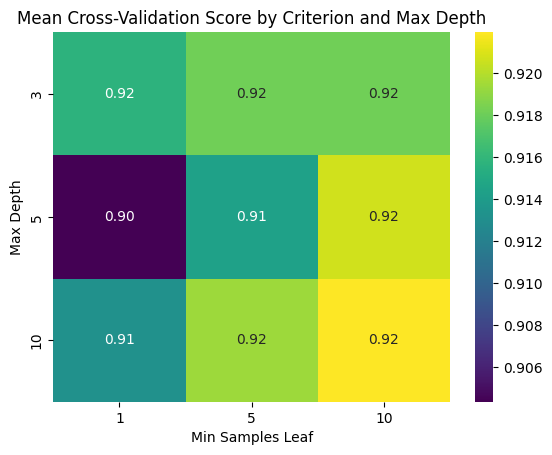

In [73]:
# Calculate mean cross-validation score for each parameter combination
mean_scores = df.pivot_table(index='Max Depth', columns='Min Samples Leaf',
                              values='Mean Cross-Validation Score', aggfunc=np.mean)

# Create the heatmap
sns.heatmap(mean_scores, cmap='viridis', annot=True, fmt='.2f')
plt.title('Mean Cross-Validation Score by Criterion and Max Depth')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Max Depth')
plt.show()

### Confusion-matrix and validation metrics

For the new classification, I will use the optimal parameter selection determined by the crosvalidation result.

In [87]:
optimal_values = df.sort_values('Mean Cross-Validation Score', ascending=False).head(1)
optimal_values

,Criterion,Min Samples Leaf,Max Depth,Mean Cross-Validation Score
3,gini,5,3,0.931987


In [90]:
from sklearn.metrics import accuracy_score, f1_score, average_precision_score
n_X_train,n_X_test, n_y_train, n_y_test = train_test_split(X_train, y_train, test_size = 0.25,random_state = 42)

clf = DecisionTreeClassifier(criterion=optimal_values.iloc[0,0], min_samples_leaf=optimal_values.iloc[0,1], max_depth=optimal_values.iloc[0,2])
clf.fit(n_X_train, n_y_train)
predictions = clf.predict(n_X_test)

print("Accuracy: ", accuracy_score(predictions, n_y_test))
print("F1: ",f1_score(predictions, n_y_test))
print("Average Precision Score: ", average_precision_score(predictions, n_y_test))

Accuracy:  0.88
F1:  0.9016393442622951
Average Precision Score:  0.8938283562012375


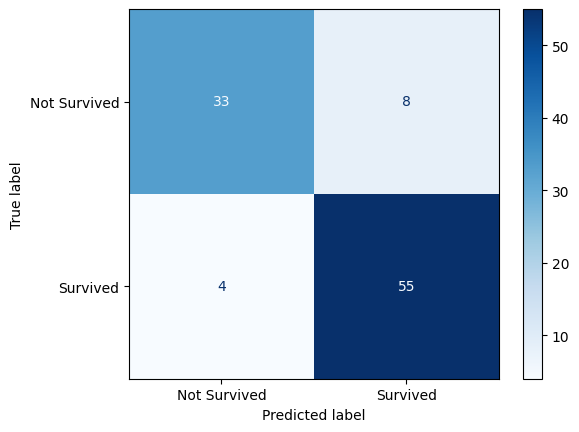

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(n_y_test, predictions, labels=clf.classes_)
label_mapping = {0: 'Not Survived', 1: 'Survived'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_mapping[label] for label in clf.classes_])
disp.plot(cmap='Blues')
plt.show()

It can be seen that false positives accounted for 8% while false negatives accounted for 4% of the prediction. 

# K-Nearest Neighbors 

## Breast Cancer Dataset

In [97]:
from sklearn.datasets import load_breast_cancer
X,y = load_breast_cancer(return_X_y = True)

In [98]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
print(X_pca.shape)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

(569, 10)


## Accuracy score for various k values

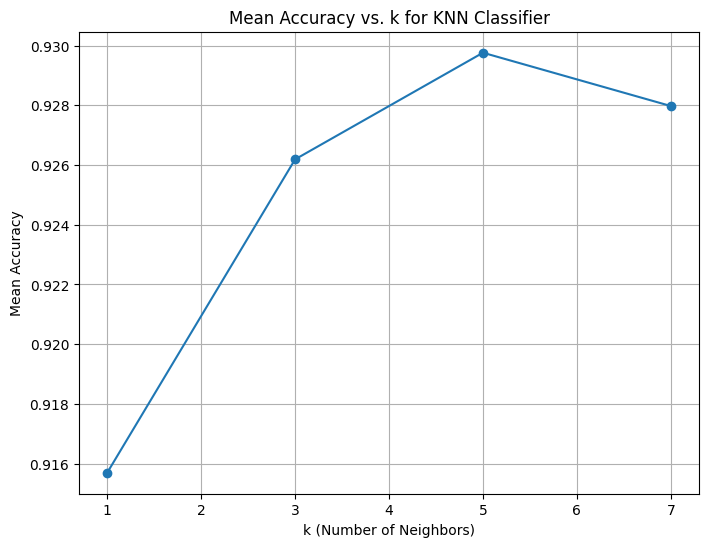

In [49]:
accuracy_scores = []
k_values = [1, 3, 5, 7]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_pca, y, cv=10)
    mean_accuracy = scores.mean()
    accuracy_scores.append(mean_accuracy)


# visualizing the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Mean Accuracy vs. k for KNN Classifier')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()

The highest accuracy is characterized by the detection of the number of neighbors equal to 5. 

## Classification accuracy for different weights and distance measures

In [101]:
from sklearn.metrics import accuracy_score
weights = ['uniform', 'distance']
metrics = ['euclidean', 'manhattan']

results = []
for weight in weights:
    for metric in metrics:
        knn = KNeighborsClassifier(weights=weight, metric=metric, n_neighbors=5)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((weight, metric, accuracy))

for weight, metric, accuracy in results:
    print(f'Weights: {weight}, Metric: {metric}, Accuracy: {accuracy}')

Weights: uniform, Metric: euclidean, Accuracy: 0.9590643274853801
Weights: uniform, Metric: manhattan, Accuracy: 0.9473684210526315
Weights: distance, Metric: euclidean, Accuracy: 0.9532163742690059
Weights: distance, Metric: manhattan, Accuracy: 0.9532163742690059


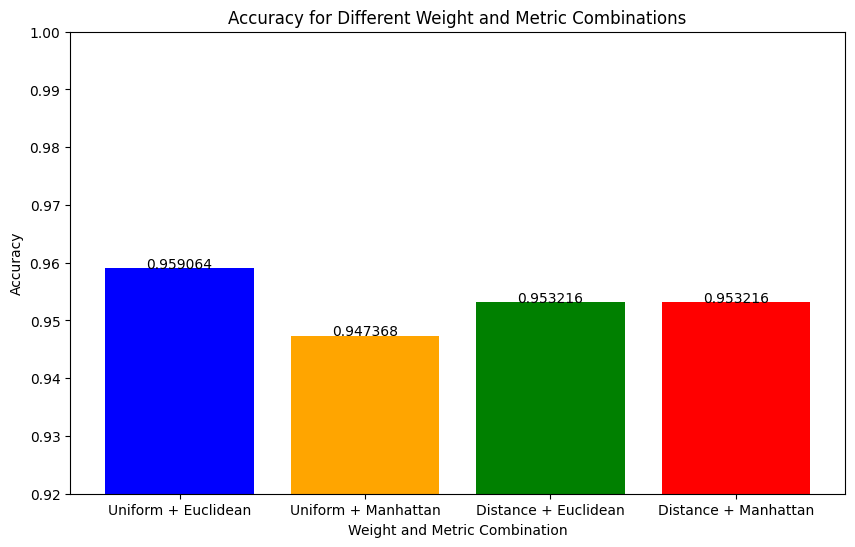

In [102]:
# Plotting the results
uniform_euclidean_accuracy = results[0][2]
uniform_manhattan_accuracy = results[1][2]
distance_euclidean_accuracy = results[2][2]
distance_manhattan_accuracy = results[3][2]

labels = ['Uniform + Euclidean', 'Uniform + Manhattan', 'Distance + Euclidean', 'Distance + Manhattan']
accuracies = [uniform_euclidean_accuracy, uniform_manhattan_accuracy, distance_euclidean_accuracy, distance_manhattan_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.title('Accuracy for Different Weight and Metric Combinations')
plt.xlabel('Weight and Metric Combination')
plt.ylabel('Accuracy')
plt.ylim(0.92, 1)  # Setting y-axis limit to make it more clear

for i in range(len(labels)):
        plt.text(i,accuracies[i],round(accuracies[i],6), ha = 'center')
plt.show()


The highest accuracy is characterized by the combination of the Euclidean distance measure with equal weights ('uniform weights').